In [1]:
exec(open("init_notebook.py", "r").read())

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import h5py

current working dir/home/UFAD/mdmahfuzalhasan/Documents/Projects/attention-knowledge-transfer/NYUD


In [2]:
import scipy.io


MAT_PATH = '../data/nuydv2/nyu_depth_v2_labeled.mat'

# FILE = scipy.io.loadmat(MAT_PATH)
FILE = h5py.File(MAT_PATH)

images = FILE['images']
depths = FILE['depths']
labels = FILE['labels']
raw_depths = FILE['rawDepths']
names = FILE['names']
namesToIds = FILE['namesToIds']


/home/UFAD/mdmahfuzalhasan/.conda/envs/py16/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


In [3]:
# namesToIds.keys()
with h5py.File(MAT_PATH, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    # a_group_key = list(f.keys())[0]

    # # get the object type for a_group_key: usually group or dataset
    # print(type(f[a_group_key])) 

    # # If a_group_key is a group name, 
    # # this gets the object names in the group and returns as a list
    # data = list(f[a_group_key])

    # # If a_group_key is a dataset name, 
    # # this gets the dataset values and returns as a list
    # data = list(f[a_group_key])
    # # preferred methods to get dataset values:
    # ds_obj = f[a_group_key]      # returns as a h5py dataset object
    # ds_arr = f[a_group_key][()]  # returns as a numpy array


Keys: <KeysViewHDF5 ['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']>


In [4]:
# print(type(namesToIds))
# print(namesToIds[0])
# print(type(names[0]))
# type(namesToIds[0,:])
# print(names[0][0])
# print(namesToIds)
# print(names[0][0])
for i in range (0, 894):
    name = FILE[names[0][i]]
    name = ''.join(chr(i[0]) for i in name[:])
    print(i+1, name[0:])
# f = h5py.File('myfile1.mat','r') 
# test = f['db/path']
# st = test[0][0]
# obj = f[st]
# str1 = ''.join(chr(i) for i in obj[:])
# print( str1 )


1 book
2 bottle
3 cabinet
4 ceiling
5 chair
6 cone
7 counter
8 dishwasher
9 faucet
10 fire extinguisher
11 floor
12 garbage bin
13 microwave
14 paper towel dispenser
15 paper
16 pot
17 refridgerator
18 stove burner
19 table
20 unknown
21 wall
22 bowl
23 magnet
24 sink
25 air vent
26 box
27 door knob
28 door
29 scissor
30 tape dispenser
31 telephone cord
32 telephone
33 track light
34 cork board
35 cup
36 desk
37 laptop
38 air duct
39 basket
40 camera
41 pipe
42 shelves
43 stacked chairs
44 styrofoam object
45 whiteboard
46 computer
47 keyboard
48 ladder
49 monitor
50 stand
51 bar
52 motion camera
53 projector screen
54 speaker
55 bag
56 clock
57 green screen
58 mantel
59 window
60 ball
61 hole puncher
62 light
63 manilla envelope
64 picture
65 mail shelf
66 printer
67 stapler
68 fax machine
69 folder
70 jar
71 magazine
72 ruler
73 cable modem
74 fan
75 file
76 hand sanitizer
77 paper rack
78 vase
79 air conditioner
80 blinds
81 flower
82 plant
83 sofa
84 stereo
85 books
86 exit sign
87

In [6]:
    
import cv2
def save_img(img, path, index):
    img_path = os.path.join(path, str(index)+'.jpg')
    cv2.imwrite(img_path, img)

# index = 3
# print(images.shape)
# print(depths.shape)
# print(labels.shape)
# print(raw_depth.shape)
# print(names.shape)
# print(type(images))
# images = np.array(images)
# depths = np.array(depths)
# labels = np.array(labels)

# images = images.transpose(0, 3, 2, 1)
# depths = depths.transpose(0, 2, 1)
# labels = labels.transpose(0, 2, 1)

# print(images.shape)
# print(labels.shape)
# print(depths.shape)

save_path = '../data/nyudv2/RGB'

if not os.path.exists(save_path):
    os.makedirs(save_path)

depth_values = []
rd_values = []
for index in range(depths.shape[0]):
    """ save image as JPG Format """
    #image = images[index,:,:,:]
    #save_img(image, save_path, index)
    """ Images saved """
    if index%100==0:
        print("img index: ", index)
    
    depth = depths[index]
    raw_depth = raw_depths[index]

    depth_values.extend(np.unique(depth))
    rd_values.extend(np.unique(raw_depth))

    #cv2.imwrite()
    #cv2.imwrite()

    #480,640,3
    #image = image.transpose(2,1,0)
    #print(image.shape)
    

    # depth = depths[index,:,:]
    # depth = depth.transpose(1,0)
    # label = labels[index,:,:]
    # label = label.transpose(1,0)
    # # raw_depth = raw_depth[index,:,:]
    # # raw_depth = raw_depth.transpose(1,0)
    # print('after transpose ')
    # print(image.shape)
    # print(depth.shape)
    # print(label.shape)

    # show image matplotlib plt




img index:  0
img index:  100
img index:  200
img index:  300
img index:  400
img index:  500
img index:  600
img index:  700
img index:  800
img index:  900
img index:  1000
img index:  1100
img index:  1200
img index:  1300
img index:  1400


In [8]:
print("max:", np.max(depth_values), np.max(rd_values), len(depth_values), len(rd_values))

max: 9.99547 10.0 426600667 155838277


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
min depth  0.76982677
max depth  2.2960684


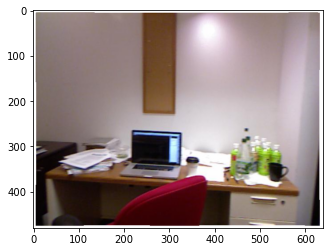

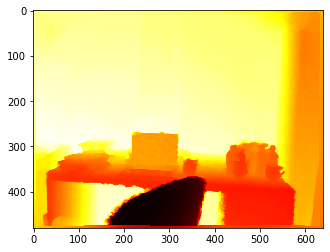

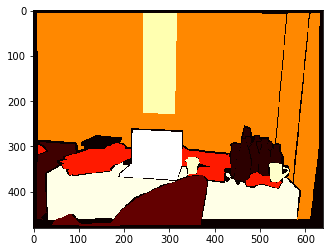

In [8]:
print(type(label), type(depth))
#  min and max in depth array
print('min depth ', np.min(depth))
print('max depth ', np.max(depth))

plt.imshow(image)
plt.show()
plt.imshow(depth, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(label, cmap='hot', interpolation='nearest')
plt.show()
# plt.imshow(raw_depth, cmap='hot', interpolation='nearest')
# plt.show()


In [14]:
import copy
type(label)

#1 get current label ID
cur_item = 5 
#2 get replacement label ID
replace_with = 0 

#3 get unique label IDs in this sample
unique = np.unique(label)

count = {}
for item in unique:
    count[item] = np.count_nonzero(label == item)  

#4 make a deep copy of the label array
label_copy = copy.deepcopy(label)

for item in unique:
    # if item == cur_item:
    label_copy[label_copy == cur_item] = replace_with
new_count = {}
new_unique = np.unique(label_copy)
for item in new_unique:
    new_count[item] = np.count_nonzero(label_copy == item)  

print('previous count', count)
print('previous unique', unique)
print('new ', new_count)
print('new unique', new_unique)


previous count {0: 52805, 5: 73360, 19: 38800, 21: 46312, 64: 15498, 78: 575, 81: 1181, 89: 31546, 143: 32434, 342: 7276, 372: 7413}
previous unique [  0   5  19  21  64  78  81  89 143 342 372]
new  {0: 126165, 19: 38800, 21: 46312, 64: 15498, 78: 575, 81: 1181, 89: 31546, 143: 32434, 342: 7276, 372: 7413}
new unique [  0  19  21  64  78  81  89 143 342 372]


In [6]:
elem_set = []
for label in labels:
    # print(type(label))
    unique = np.unique(label)
    elem_set += unique.tolist()
    # print(elem_set)

elem_set = set(elem_set)
print(elem_set)


    
    

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

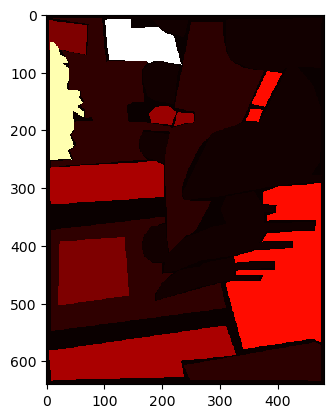

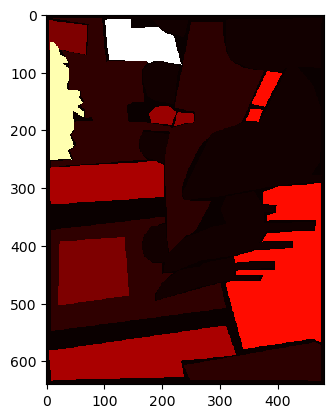

In [8]:
plt.imshow(label, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(label_copy, cmap='hot', interpolation='nearest')
plt.show()